<img src='./img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<b>

<a href="./33_ltpy_Arctic_Fires_case_study.ipynb"><< 33 - Artic fires case study </a><span style="float:right;"><a href="./342_ltpy_Ozone_hole_case_study_cams_animation.ipynb">342 - Ozone hole case study - CAMS animation >></a></span>

# 3.4 Case study - Ozone hole - Summer 2019

2019, an unusual decreased in size antarctic ozone hole was monitored. Typically, the Antarctic ozone hole starts forming every year in August, reaches a maximum size in October and closes by December. Several instruments and products, including `GOME-2`, `IASI` and `CAMS`, are able to visualize the unusual behaviour.

This notebook will show examples of the unusual ozone hole in summer 2019, seen by the the following data products on `10 September 2019`:
- [GOME-2 Level-2 Total Column Ozone](#gome2)
- [IASI Total Column Ozone](#iasi)
- [CAMS Total Column Ozone forecast](#cams_nrt)

Read more about the unusual ozone hole [here](https://scienceblog.eumetsat.int/2019/09/working-together-for-the-benefit-of-our-planet/) and [here](https://atmosphere.copernicus.eu/cams-monitors-very-unusual-2019-ozone-hole).

#### Load required libraries

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import ipynb

from netCDF4 import Dataset
import pandas as pd


from matplotlib import animation

from IPython.display import HTML
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

#### Load helper functions

In [2]:
from ipynb.fs.full.ltpy_functions import load_l2_data_xr, generate_masked_array, generate_xr_from_1D_vec, visualize_imshow, visualize_pcolormesh, visualize_l2, visualize_gome_mollweide


<hr>

## GOME-2 Level-2 Total Column Ozone

#### Load the GOME-2 Level-2 data for Metop-A and Metop-B

Load the `total column ozone` parameter from GOME-2 Level-2 data for both satellites, Metop-A and Metop-B. You can use the function [load_l2_data_xr](./ltpy_functions.ipynb#load_l2_data_xr). The Ozone parameter is stored as `'TOTAL_COLUMNS/O3'` within the data file.

Let's first load the data for Metop-A followed by the data from Metop-B.

In [3]:
directory_2a = '../eodata/gome2/offline/2a/2019/09/10/'
o3_a_da_mf = load_l2_data_xr(directory_2a, 'hdf5', 'TOTAL_COLUMNS', 'O3', 'GEOLOCATION/LatitudeCentre', 'GEOLOCATION/LongitudeCentre', no_of_dims=1, paramname='NO2Tropo',longname='Tropospheric column density of O3', unit='DU', )
o3_a_da_mf

<xarray.DataArray 'NO2Tropo' (ground_pixel: 211519)>
array([301.47208, 303.73923, 302.94592, ..., 216.96585, 217.27461,
       214.32776], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 71.83148 72.10565 ... -73.71554 -74.04348
    longitude  (ground_pixel) float32 298.1526 297.39972 ... 251.23904 250.76451
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

In [5]:
directory_2b = '../eodata/gome2/offline/2b/2019/09/10/'
o3_b_da_mf = load_l2_data_xr(directory_2b, 'hdf5', 'TOTAL_COLUMNS', 'O3', 'GEOLOCATION/LatitudeCentre', 'GEOLOCATION/LongitudeCentre', no_of_dims=1, paramname='NO2Tropo',longname='Tropospheric column density of O3', unit='DU')
o3_b_da_mf

<xarray.DataArray 'NO2Tropo' (ground_pixel: 226367)>
array([310.85004, 311.19128, 312.12122, ..., 218.86372, 218.95638,
       218.9725 ], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 70.90904 71.141396 ... -77.718636
    longitude  (ground_pixel) float32 301.77054 300.92084 ... 347.9887 347.5781
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

#### Load cloud fraction information

The next step is to load the `CloudFraction` information, for both, Metop-A and Metop-B data. You can use again the function [load_l2_data_xr](./ltpy_functions.ipynb#load_l2_data_xr). As internal filepath, you can specify `CLOUD_PROPERTIES` and parameter is `CloudFraction` respectively.

In [8]:
cloud_fraction_2a = load_l2_data_xr(directory_2a, 'hdf5', 'CLOUD_PROPERTIES','CloudFraction', 'GEOLOCATION/LatitudeCentre', 'GEOLOCATION/LongitudeCentre', no_of_dims=1, paramname='NO2Tropo',longname='Cloud Fraction',unit='-') 
cloud_fraction_2a

<xarray.DataArray 'NO2Tropo' (ground_pixel: 211519)>
array([0.69386333, 0.6946315 , 0.77895373, ..., 0.95868707, 0.92348456,
       0.8495547 ], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 71.83148 72.10565 ... -73.71554 -74.04348
    longitude  (ground_pixel) float32 298.1526 297.39972 ... 251.23904 250.76451
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Cloud Fraction
    units:      -

In [9]:
cloud_fraction_2b = load_l2_data_xr(directory_2b, 'hdf5', 'CLOUD_PROPERTIES','CloudFraction', 'GEOLOCATION/LatitudeCentre', 'GEOLOCATION/LongitudeCentre', no_of_dims=1, paramname='NO2Tropo', longname='Cloud Fraction',unit='-') 
cloud_fraction_2b

<xarray.DataArray 'NO2Tropo' (ground_pixel: 226367)>
array([0.881877 , 0.8344188, 0.8443081, ..., 0.9003831, 1.       ,
       1.       ], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 70.90904 71.141396 ... -77.718636
    longitude  (ground_pixel) float32 301.77054 300.92084 ... 347.9887 347.5781
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Cloud Fraction
    units:      -

#### Mask the data array based on the cloud fraction information

Now you can mask the Ozone data with the help of the `CloudFraction` information and the function [generate_masked_array](./ltpy_functions.ipynb#generate_masked_array).

In [10]:
o3_b_da_masked = generate_masked_array(o3_b_da_mf, cloud_fraction_2b, 0.5, '<', drop=False)
o3_b_da_mf_flagged = o3_b_da_masked[o3_b_da_masked > 0]

<xarray.DataArray 'NO2Tropo' (ground_pixel: 226367)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 70.90904 71.141396 ... -77.718636
    longitude  (ground_pixel) float32 301.77054 300.92084 ... 347.9887 347.5781
Dimensions without coordinates: ground_pixel


In [11]:
o3_a_da_masked = generate_masked_array(o3_a_da_mf, cloud_fraction_2a, 0.5, '<', drop=False)
o3_a_da_masked

<xarray.DataArray 'NO2Tropo' (ground_pixel: 211519)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 71.83148 72.10565 ... -73.71554 -74.04348
    longitude  (ground_pixel) float32 298.1526 297.39972 ... 251.23904 250.76451
Dimensions without coordinates: ground_pixel


<xarray.DataArray 'NO2Tropo' (ground_pixel: 211519)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 71.83148 72.10565 ... -73.71554 -74.04348
    longitude  (ground_pixel) float32 298.1526 297.39972 ... 251.23904 250.76451
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

#### Concatenate both data arrays 

The final step before visualizing the data is to concatenate the two masked data arrays with `xarray.concat` and the common dimension `ground_pixel`.

In [12]:
o3_ab_da_masked = xr.concat([o3_a_da_masked, o3_b_da_masked], dim='ground_pixel')
o3_ab_da_masked

<xarray.DataArray 'NO2Tropo' (ground_pixel: 437886)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 71.83148 72.10565 ... -77.38068 -77.718636
    longitude  (ground_pixel) float32 298.1526 297.39972 ... 347.9887 347.5781
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

#### Visualize the data in a Mollweide projection

The function [visualize_gome_mollweide](./ltpy_functions.ipynb#visualize_gome_mollweide) allows you to visualize the final data array.

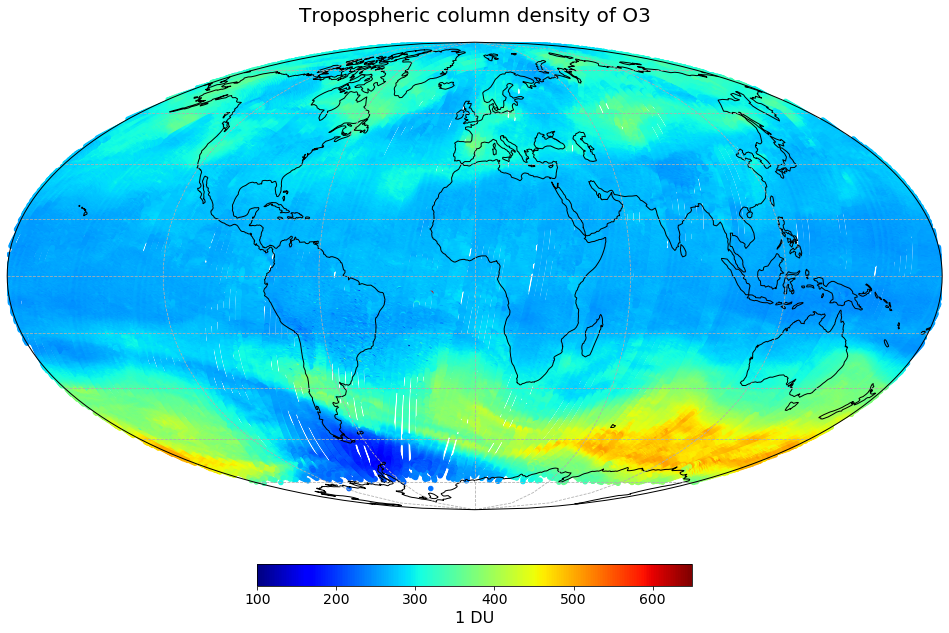

In [13]:
visualize_gome_mollweide(o3_ab_da_masked, 1, 'jet', 20, vmin=100, vmax=650)

<br>

## <a id='iasi'></a>IASI total column ozone

#### Load the data with xarray's function `open_dataset`

Load the IASI total column ozone for both, Metop-A and Metop-B satellites.

In [14]:
file_name_2a = '../eodata/iasi/nc/2a/2019/09/IASI_FORLI_O3_metopa_20190910_v20151001.nc'
file_2a = xr.open_dataset(file_name_2a)
file_2a

<xarray.Dataset>
Dimensions:                               (nlayers: 41, nobservations: 173190, npressures: 42)
Dimensions without coordinates: nlayers, nobservations, npressures
Data variables:
    latitude                              (nobservations) float32 ...
    longitude                             (nobservations) float32 ...
    time                                  (nobservations) int32 ...
    sun_zen_angle                         (nobservations) float32 ...
    satellite_zen_angle                   (nobservations) float32 ...
    orbit_number                          (nobservations) int32 ...
    scanline_number                       (nobservations) int32 ...
    pixel_number                          (nobservations) int32 ...
    cloud_cover                           (nobservations) float32 ...
    dofs                                  (nobservations) float32 ...
    retrieval_quality_flag                (nobservations) int32 ...
    surface_altitude                      (nobservations) float32 ...
    tropopause_altitude                   (nobservations) float32 ...
    thermal_contrast                      (nobservations) float32 ...
    ozone_total_column                    (nobservations) float32 ...
    ozone_partial_column_profile          (nobservations, nlayers) float32 ...
    ozone_partial_column_error            (nobservations, nlayers) float32 ...
    ozone_apriori_partial_column_profile  (nobservations, nlayers) float32 ...
    air_partial_column_profile            (nobservations, nlayers) float32 ...
    atmosphere_pressure_grid              (nobservations, npressures) float32 ...
    averaging_kernels_matrix              (nobservations, nlayers, nlayers) float32 ...
Attributes:
    title:                     ESA CCI ozone IASI products (profiles and tota...
    institution:               ULB/LATMOS
    source:                    Eumetsat IASI Level-1C data (version 4 up to 2...
    history:                   2019-10-15 08:36:36 (date of data production) ...
    references:                FORLI (Hurtmans et al (2012): doi:10.1016/j.jq...
    tracking_id:               e653ecb4-ef26-11e9-869d-14feb5c66f1c
    conventions:               CF-1.6
    product_version:           v20151001
    summary:                   This dataset contains Level-2 ozone profile an...
    keywords:                  satellite, observation, atmosphere, ozone
    id:                        IASI_FORLI_O3_metopa_20190910_v20151001.nc
    naming_authority:          ULB/LATMOS
    keywords_vocabulary:       GCMD Science Keywords
    cdm_data_type:             profile, total column
    comment:                   This dataset was produced as part of the Ozone...
    creator_name:              ULB/LATMOS
    creator_email:             juliette.hadji-lazaro@latmos.ipsl.fr
    project:                   Climate Change Initiative - European Space Agency
    geospatial_lat_min:        -90.0
    geospatial_lat_max:        +90.0
    geospatial_lon_min:        -180.0
    geospatial_lon_max:        +180.0
    geospatial_vertical_min:   0
    geospatial_vertical_max:   60000
    time_coverage_start:       20190910T000000Z
    time_coverage_end:         20190910T235959Z
    time_coverage_duration:    P1D
    time_coverage_resolution:  P8S
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    license:                   ESA CCI Data Policy: free and open acess
    platform:                  METOP-A
    sensor:                    IASI
    spatial_resolution:        12 km at nadir

In [15]:
file_name_2b_2019 = '../eodata/iasi/nc/2b/2019/09/IASI_FORLI_O3_metopb_20190910_v20151001.nc'
file_2b_2019 = xr.open_dataset(file_name_2b_2019)
file_2b_2019

<xarray.Dataset>
Dimensions:                               (nlayers: 41, nobservations: 279090, npressures: 42)
Dimensions without coordinates: nlayers, nobservations, npressures
Data variables:
    latitude                              (nobservations) float32 ...
    longitude                             (nobservations) float32 ...
    time                                  (nobservations) int32 ...
    sun_zen_angle                         (nobservations) float32 ...
    satellite_zen_angle                   (nobservations) float32 ...
    orbit_number                          (nobservations) int32 ...
    scanline_number                       (nobservations) int32 ...
    pixel_number                          (nobservations) int32 ...
    cloud_cover                           (nobservations) float32 ...
    dofs                                  (nobservations) float32 ...
    retrieval_quality_flag                (nobservations) int32 ...
    surface_altitude                      (nobservations) float32 ...
    tropopause_altitude                   (nobservations) float32 ...
    thermal_contrast                      (nobservations) float32 ...
    ozone_total_column                    (nobservations) float32 ...
    ozone_partial_column_profile          (nobservations, nlayers) float32 ...
    ozone_partial_column_error            (nobservations, nlayers) float32 ...
    ozone_apriori_partial_column_profile  (nobservations, nlayers) float32 ...
    air_partial_column_profile            (nobservations, nlayers) float32 ...
    atmosphere_pressure_grid              (nobservations, npressures) float32 ...
    averaging_kernels_matrix              (nobservations, nlayers, nlayers) float32 ...
Attributes:
    title:                     ESA CCI ozone IASI products (profiles and tota...
    institution:               ULB/LATMOS
    source:                    Eumetsat IASI Level-1C data (version 4 up to 2...
    history:                   2019-10-15 11:42:01 (date of data production) ...
    references:                FORLI (Hurtmans et al (2012): doi:10.1016/j.jq...
    tracking_id:               cd88a4c6-ef40-11e9-b031-14feb5c66f1c
    conventions:               CF-1.6
    product_version:           v20151001
    summary:                   This dataset contains Level-2 ozone profile an...
    keywords:                  satellite, observation, atmosphere, ozone
    id:                        IASI_FORLI_O3_metopb_20190910_v20151001.nc
    naming_authority:          ULB/LATMOS
    keywords_vocabulary:       GCMD Science Keywords
    cdm_data_type:             profile, total column
    comment:                   This dataset was produced as part of the Ozone...
    creator_name:              ULB/LATMOS
    creator_email:             juliette.hadji-lazaro@latmos.ipsl.fr
    project:                   Climate Change Initiative - European Space Agency
    geospatial_lat_min:        -90.0
    geospatial_lat_max:        +90.0
    geospatial_lon_min:        -180.0
    geospatial_lon_max:        +180.0
    geospatial_vertical_min:   0
    geospatial_vertical_max:   60000
    time_coverage_start:       20190910T000000Z
    time_coverage_end:         20190910T235959Z
    time_coverage_duration:    P1D
    time_coverage_resolution:  P8S
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    license:                   ESA CCI Data Policy: free and open acess
    platform:                  METOP-B
    sensor:                    IASI
    spatial_resolution:        12 km at nadir

#### Select the variable `ozone_total_column`  and generate a `xarray`

You can select the variable of interest. In this case the variable of interest is `ozone_total_column`. You can continue to generate a xarray with the variable selected and the associated geographic coordinates. You can use the function [generate_xr_from_1D_vec](./ltpy_functions.ipynb#generate_xr_from_1d_vec).

In [16]:
o3_2019=file_2b_2019['ozone_total_column']

o3_da_2b = generate_xr_from_1D_vec(file_2b_2019, 'latitude', 'longitude', o3_2019, 'O3', file_2b_2019.title, 1, o3_2019.units)
o3_da_2b

<xarray.DataArray 'O3' (ground_pixel: 279090)>
array([0.1289723, 0.1268423, 0.1265471, ..., 0.1473683, 0.141187 ,
       0.1421669], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 36.33715 36.4993 ... 70.13889 69.50383
    longitude  (ground_pixel) float32 -41.40165 -41.44555 ... 150.56488
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  ESA CCI ozone IASI products (profiles and total columns)
    units:      mol m-2

In [17]:
o3=file_2a['ozone_total_column']

o3_da_2a = generate_xr_from_1D_vec(file_2a, 'latitude', 'longitude', o3, 'O3', file_2a.title, 1, o3.units)
o3_da_2a

<xarray.DataArray 'O3' (ground_pixel: 173190)>
array([0.1472456, 0.1030852, 0.101777 , ..., 0.121807 , 0.127306 ,
       0.1221179], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 -53.50967 -55.93536 ... 19.08587 18.91841
    longitude  (ground_pixel) float32 -26.14553 -42.35807 ... -45.36528
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  ESA CCI ozone IASI products (profiles and total columns)
    units:      mol m-2

#### Concatenate the two data array based on the dimension `ground_pixel`

In [18]:
o3_da_2ab = xr.concat([o3_da_2a, o3_da_2b], dim='ground_pixel')

#### Convert from molecules per metre square to Dobson Unit by multiplying by 2241

The unit of the data is `molecules per metre square`. Ozone is often expressed in `Dobson Unit`. `Molecules / metre square` can be converted to `Dobson Unit [DU]` by multiplying the values with 2241.

In [19]:
o3_da_2ab_du = o3_da_2ab * 2241

#### Flag elevated values

Ozone values higher than 500 can be flagged out with xarray's function `where`.

In [20]:
o3_da_2ab_du_flagged = xr.where(o3_da_2ab_du > 500, np.nan, o3_da_2ab_du)

#### Visualize the data array in an `Orthographic()` projection with the function `visualize_l2`

The final step is to visualize the flagged data.

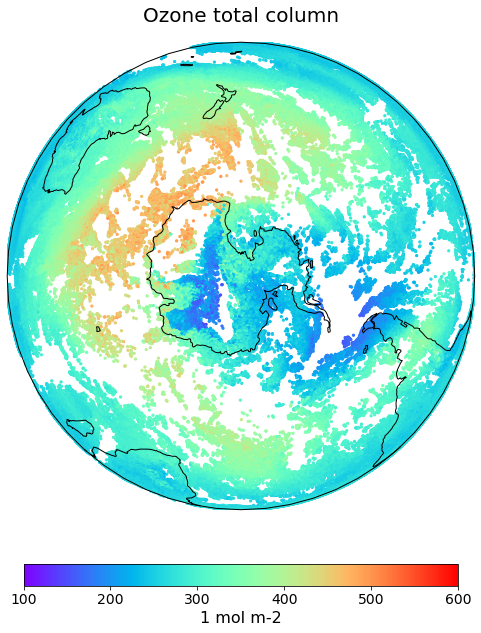

In [21]:
visualize_l2(o3_da_2ab_du_flagged, 1, ccrs.Orthographic(180,-90),100,600, 5,'rainbow','mol m-2','Ozone total column',set_global=True)

<br>

## <a id='cams_nrt'></a>CAMS Total Column Ozone Forecast

#### Load the CAMS forecast data with xarray's function `open_dataset`

In [22]:
cams_fc = '../eodata/cams/nrt/o3/2019/09/10/20190910_o3_fc.nc'
cams_fc_xr = xr.open_dataset(cams_fc)
cams_fc_xr

<xarray.Dataset>
Dimensions:    (latitude: 451, longitude: 900, time: 6)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.6 -179.2 ... 178.8 179.2 179.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
  * time       (time) datetime64[ns] 2019-09-10 2019-09-11 ... 2019-09-15
Data variables:
    gtco3      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-12-08 10:15:35 GMT by grib_to_netcdf-2.14.1: grib_to_n...

#### Select the variable `gtco3` from the dataset

In [23]:
cams_o3 = cams_fc_xr['gtco3']
cams_o3

<xarray.DataArray 'gtco3' (time: 6, latitude: 451, longitude: 900)>
[2435400 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.6 -179.2 ... 178.8 179.2 179.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
  * time       (time) datetime64[ns] 2019-09-10 2019-09-11 ... 2019-09-15
Attributes:
    units:      kg m**-2
    long_name:  GEMS Total column ozone

#### Convert the data values from `kg m**-2` to `Dobson Unit`

In [24]:
cams_o3_du = cams_o3 / (2.1415*1e-5)
cams_o3_du

<xarray.DataArray 'gtco3' (time: 6, latitude: 451, longitude: 900)>
array([[[282.82578, 282.82578, 282.82578, ..., 282.82578, 282.82578,
         282.82578],
        [283.98798, 283.99817, 284.00833, ..., 283.95737, 283.96756,
         283.97778],
        [285.59875, 285.6191 , 285.63953, ..., 285.53247, 285.55286,
         285.57834],
        ...,
        [233.81432, 233.8296 , 233.8449 , ..., 233.76845, 233.78372,
         233.79901],
        [232.94267, 232.94775, 232.95795, ..., 232.91718, 232.92227,
         232.93246],
        [230.96997, 230.96997, 230.96997, ..., 230.96997, 230.96997,
         230.96997]],

       [[283.4986 , 283.4986 , 283.4986 , ..., 283.4986 , 283.4986 ,
         283.4986 ],
        [286.2665 , 286.2818 , 286.292  , ..., 286.2359 , 286.2461 ,
         286.25632],
        [289.0191 , 289.0395 , 289.05988, ..., 288.95285, 288.9732 ,
         288.9987 ],
        ...,
        [231.18405, 231.15857, 231.13307, ..., 231.26053, 231.23505,
         231.20953],
        [228.3448 , 228.32953, 228.31932, ..., 228.3805 , 228.3703 ,
         228.35501],
        [227.63628, 227.63628, 227.63628, ..., 227.63628, 227.63628,
         227.63628]],

       [[282.08154, 282.08154, 282.08154, ..., 282.08154, 282.08154,
         282.08154],
        [284.30908, 284.30402, 284.30402, ..., 284.3142 , 284.3142 ,
         284.30908],
        [288.51956, 288.51443, 288.50937, ..., 288.52975, 288.52975,
         288.52463],
        ...,
        [254.10704, 254.09175, 254.07137, ..., 254.16312, 254.14273,
         254.12744],
        [253.26598, 253.25578, 253.24559, ..., 253.29147, 253.28127,
         253.27107],
        [254.02548, 254.02548, 254.02548, ..., 254.02548, 254.02548,
         254.02548]],

       [[291.49643, 291.49643, 291.49643, ..., 291.49643, 291.49643,
         291.49643],
        [290.25266, 290.24246, 290.23737, ..., 290.27814, 290.26794,
         290.26288],
        [288.49408, 288.47876, 288.45837, ..., 288.54504, 288.52975,
         288.50937],
        ...,
        [231.0617 , 231.04643, 231.03622, ..., 231.10759, 231.0923 ,
         231.07703],
        [230.33788, 230.3277 , 230.32262, ..., 230.35828, 230.35318,
         230.34299],
        [230.35318, 230.35318, 230.35318, ..., 230.35318, 230.35318,
         230.35318]],

       [[274.78717, 274.78717, 274.78717, ..., 274.78717, 274.78717,
         274.78717],
        [276.36737, 276.36737, 276.36737, ..., 276.37247, 276.37247,
         276.37247],
        [277.56525, 277.56015, 277.56015, ..., 277.57544, 277.57034,
         277.57034],
        ...,
        [257.37958, 257.38977, 257.39487, ..., 257.3541 , 257.3643 ,
         257.36935],
        [255.59549, 255.60057, 255.60057, ..., 255.58017, 255.58528,
         255.5904 ],
        [253.86237, 253.86237, 253.86237, ..., 253.86237, 253.86237,
         253.86237]],

       [[269.94974, 269.94974, 269.94974, ..., 269.94974, 269.94974,
         269.94974],
        [271.09668, 271.09668, 271.10175, ..., 271.09155, 271.09155,
         271.09668],
        [273.25287, 273.25797, 273.25797, ..., 273.24268, 273.24774,
         273.24774],
        ...,
        [252.48097, 252.46059, 252.4453 , ..., 252.52684, 252.51155,
         252.49626],
        [251.17093, 251.16075, 251.15564, ..., 251.19644, 251.18623,
         251.18115],
        [250.95685, 250.95685, 250.95685, ..., 250.95685, 250.95685,
         250.95685]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.6 -179.2 ... 178.8 179.2 179.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
  * time       (time) datetime64[ns] 2019-09-10 2019-09-11 ... 2019-09-15

#### Visualize one time step with `visualize_pcolormesh`

(<Figure size 1440x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9143070240>)

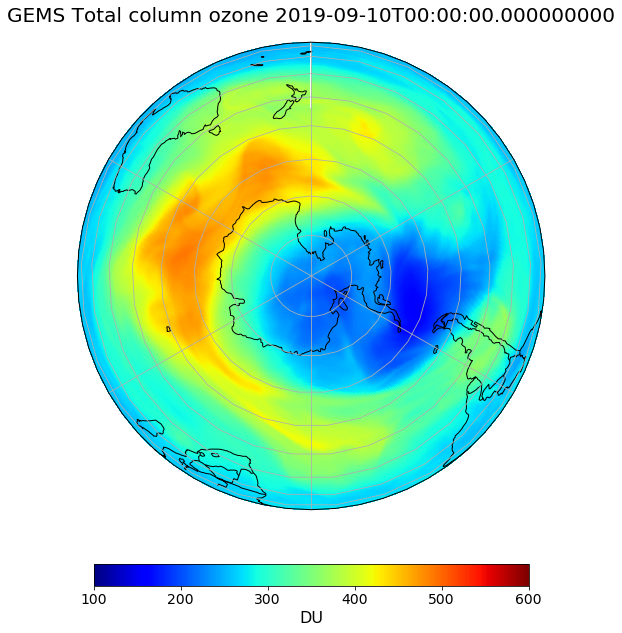

In [25]:
visualize_pcolormesh(cams_o3_du[0,:,:],cams_o3_du.longitude, cams_o3_du.latitude, ccrs.Orthographic(180,-90.),'jet','DU', cams_o3.long_name + ' '+ str(cams_o3_du.time[0].data),100,600, -180, 179.6, -90. , 90., log=False,set_global=True)


See [here](./342_ltpy_Ozone_hole_case_study_cams_animation.ipynb) the CAMS Total column ozone forecast animated over five days.

<br>

<a href="./33_ltpy_Arctic_Fires_case_study.ipynb"><< 33 - Artic fires case study </a><span style="float:right;"><a href="./342_ltpy_Ozone_hole_case_study_cams_animation.ipynb">342 - Ozone hole case study - CAMS animation >></a></span>

<hr>

<p style="text-align:left;">This project is licensed under the <a href="./LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:training@eumetsat.int>Contact</a></span></p>